In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.random.set_seed(42)

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
data = pd.read_csv("hf://datasets/manirai91/yt-nepali-movie-reviews/yt-nepali-movie-reviews.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
data.head()

,text,label
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1


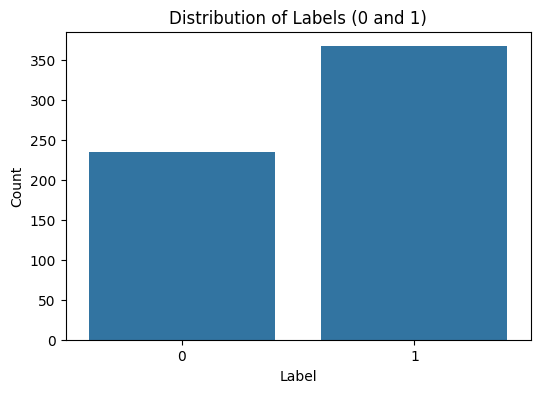

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['label'])
plt.title('Distribution of Labels (0 and 1)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [5]:
vocab_size = 1000
max_sequence_length = 100
embedding_dim = 50

In [8]:
# Simulated Data (Replace this with your dataset)
texts = data['text']
labels = data['label']

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="OOV")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [58]:
tokenizer.index_word

{1: 'OOV',
 2: 'फिल्म',
 3: 'राम्रो',
 4: 'छ',
 5: 'यो',
 6: 'पनि',
 7: 'को',
 8: '।',
 9: 'त',
 10: 'नेपाली',
 11: 'धेरै',
 12: 'हो',
 13: 'फिलिम',
 14: 'मन',
 15: 'र',
 16: 'मा',
 17: 'चलचित्र',
 18: 'कथा',
 19: 'नै',
 20: 'जस्तो',
 21: 'यस्तो',
 22: 'न',
 23: 'लाग्यो',
 24: 'रहेछ',
 25: 'भन्दा',
 26: 'तर',
 27: 'के',
 28: 'कति',
 29: 'अनि',
 30: 'हेर्न',
 31: 'ले',
 32: 'लाई',
 33: 'नि',
 34: 'होला',
 35: 'छैन',
 36: 'सबै',
 37: 'सारै',
 38: 'हुन्छ',
 39: 'अभिनय',
 40: 'कस्तो',
 41: 'भनेको',
 42: 'अति',
 43: 'मुभी',
 44: 'बनेको',
 45: 'कुनै',
 46: 'छ।',
 47: 'मात्र',
 48: 'कलाकार',
 49: 'हरु',
 50: 'पर्यो',
 51: 'उत्कृष्ट',
 52: 'यार',
 53: 'झुर',
 54: 'रैछ',
 55: 'एक',
 56: 'कि',
 57: 'मलाई',
 58: 'हेरेको',
 59: 'म',
 60: 'गरेको',
 61: 'छि',
 62: 'कुरा',
 63: 'बनाउनु',
 64: 'हेरेर',
 65: 'छोयो',
 66: 'यस्तै',
 67: 'हेरे',
 68: 'अरु',
 69: 'भयो',
 70: 'बनाको',
 71: 'हेर्दा',
 72: 'लागेन',
 73: 'अलि',
 74: 'बस्तु',
 75: 'हिरो',
 76: 'पछि',
 77: 'फ्लिम',
 78: 'जति',
 79: 'एकदमै',
 80:

In [10]:
len(tokenizer.word_counts)

2633

In [11]:
max_len = max(len(seq) for seq in sequences)
max_len

55

In [12]:
X = pad_sequences(sequences, maxlen=25, padding='post', truncating='pre')
y = np.array(labels)

In [29]:
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
y = np.array(labels)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3333, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

In [14]:
X_train.shape, X_val.shape, X_test.shape

((401, 100), (50, 100), (151, 100))

In [15]:
model_with_embedding = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    SimpleRNN(units=64, activation='tanh'),
    Dense(1, activation='sigmoid')  # Single output unit for binary classification
])
model_with_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:

history_with_embedding = model_with_embedding.fit(
    X_train, y_train,
    epochs=5, batch_size=16,
    validation_data=(X_val, y_val)
)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6760 - loss: 0.6224 - val_accuracy: 0.6000 - val_loss: 0.7018
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6895 - loss: 0.6254 - val_accuracy: 0.4200 - val_loss: 0.8762
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5212 - loss: 0.7354 - val_accuracy: 0.4600 - val_loss: 0.7798
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5764 - loss: 0.7038 - val_accuracy: 0.6800 - val_loss: 0.5934
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7662 - loss: 0.5488 - val_accuracy: 0.7800 - val_loss: 0.5312


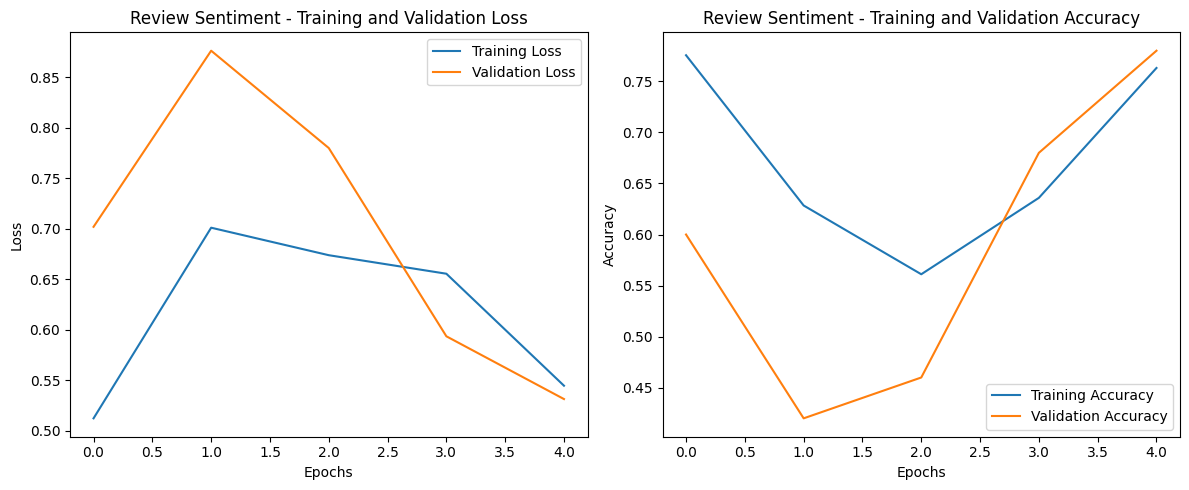

In [19]:
def plot_training_metrics(history, title):
    """
    Plots the training and validation loss and accuracy for a given model's history.

    Parameters:
    history: The History object returned by model.fit().
    model_name: Name of the model for title display.
    """
    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_metrics(history_with_embedding, 'Review Sentiment')


In [20]:
test_accuracy = model_with_embedding.evaluate(X_test, y_test)[1]
print("Model with Embedding Test Accuracy:", test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7336 - loss: 0.5673
Model with Embedding Test Accuracy: 0.7152317762374878


In [22]:
model_without_embedding = Sequential([
    SimpleRNN(units=64, activation='tanh', input_shape=(max_sequence_length, 1)),
    Dense(1, activation='sigmoid')
])
model_without_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5923 - loss: 0.6900 - val_accuracy: 0.6000 - val_loss: 0.6772
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6357 - loss: 0.6633 - val_accuracy: 0.6000 - val_loss: 0.6672
Epoch 3/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6176 - loss: 0.6612 - val_accuracy: 0.6000 - val_loss: 0.6728
Epoch 4/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6255 - loss: 0.6577 - val_accuracy: 0.6600 - val_loss: 0.6619
Epoch 5/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6131 - loss: 0.6531 - val_accuracy: 0.6000 - val_loss: 0.6799
Epoch 6/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6219 - loss: 0.6561 - val_accuracy: 0.6000 - val_loss: 0.6823
Epoch 7/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6207 - loss: 0.6539 - val_accuracy: 0.6200 - val_loss: 0.6741
Epoch 8/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6320 - loss: 0.6435 - val_accuracy: 0.6000 - val_loss:

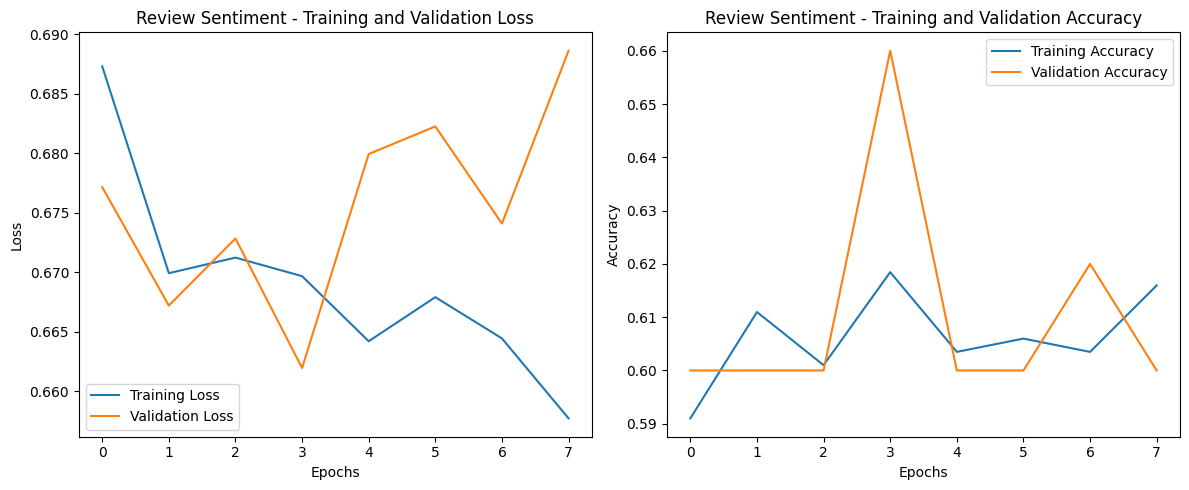

In [23]:
X_train_rnn = X_train[..., np.newaxis]
X_val_rnn = X_val[..., np.newaxis]
X_test_rnn = X_test[..., np.newaxis]

history_without_embedding = model_without_embedding.fit(
    X_train_rnn, y_train,
    epochs=8, batch_size=32,
    validation_data=(X_val_rnn, y_val)
)
plot_training_metrics(history_without_embedding, 'Review Sentiment')

In [24]:
test_accuracy = model_without_embedding.evaluate(X_test_rnn, y_test)[1]
print("Model without Embedding Test Accuracy:", test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5902 - loss: 0.6714 
Model without Embedding Test Accuracy: 0.6026490330696106


In [62]:
max_len = max(len(seq) for seq in sequences)
max_len

X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3333, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(units=64, activation='tanh', return_sequences=True),
    SimpleRNN(units=32, activation='tanh'),
    Dense(1, activation='sigmoid')  # Single output unit for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6205 - loss: 0.6791 - val_accuracy: 0.4800 - val_loss: 0.6540
Epoch 2/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7920 - loss: 0.4944 - val_accuracy: 0.6600 - val_loss: 0.5308
Epoch 3/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8997 - loss: 0.3174 - val_accuracy: 0.6200 - val_loss: 0.6642
Epoch 4/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9043 - loss: 0.2719 - val_accuracy: 0.5400 - val_loss: 1.0487
Epoch 5/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9179 - loss: 0.2275 - val_accuracy: 0.4600 - val_loss: 1.2553
Epoch 6/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9004 - loss: 0.2641 - val_accuracy: 0.4600 - val_loss: 1.3643
Epoch 7/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6267 - loss: 0.8404 - val_accuracy: 0.3800 - val_loss: 1.0370
Epoch 8/8
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5344 - loss: 0.7615 - val_accuracy: 0.4800 - val_loss:

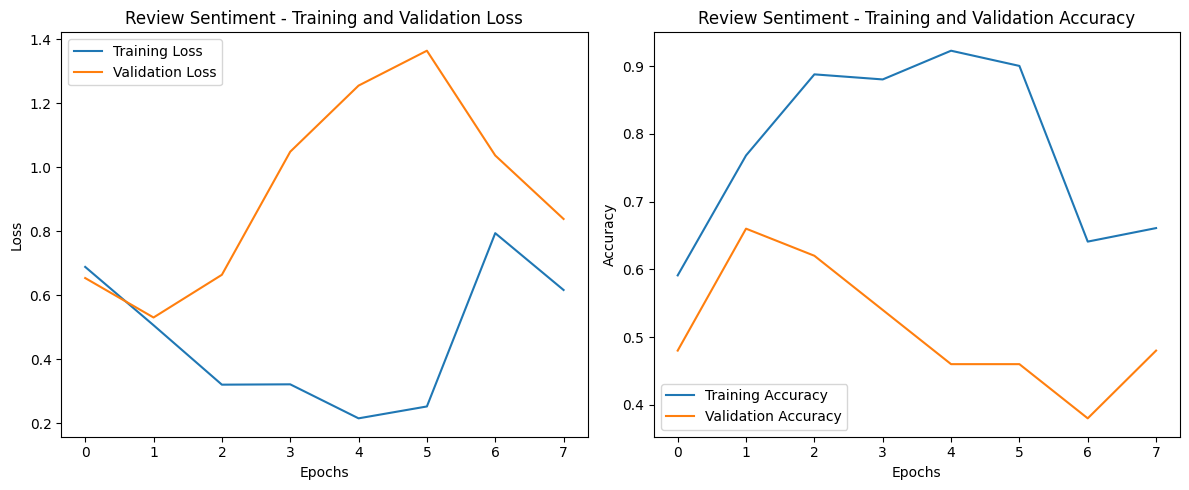

In [63]:
history = model.fit(
    X_train, y_train,
    epochs=8, batch_size=16,
    validation_data=(X_val, y_val)
)

plot_training_metrics(history, 'Review Sentiment')

In [64]:
test_accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5845 - loss: 0.8013 
Test Accuracy: 0.5827814340591431


In [44]:
X = pad_sequences(sequences, maxlen=25, padding='post', truncating='post')
y = np.array(labels)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3333, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5608 - loss: 0.7125 - val_accuracy: 0.5800 - val_loss: 0.6389
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8493 - loss: 0.4368 - val_accuracy: 0.6800 - val_loss: 0.6428
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9698 - loss: 0.1508 - val_accuracy: 0.6400 - val_loss: 0.8847
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9873 - loss: 0.0607 - val_accuracy: 0.6400 - val_loss: 0.9688
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9933 - loss: 0.0264 - val_accuracy: 0.5400 - val_loss: 1.1329


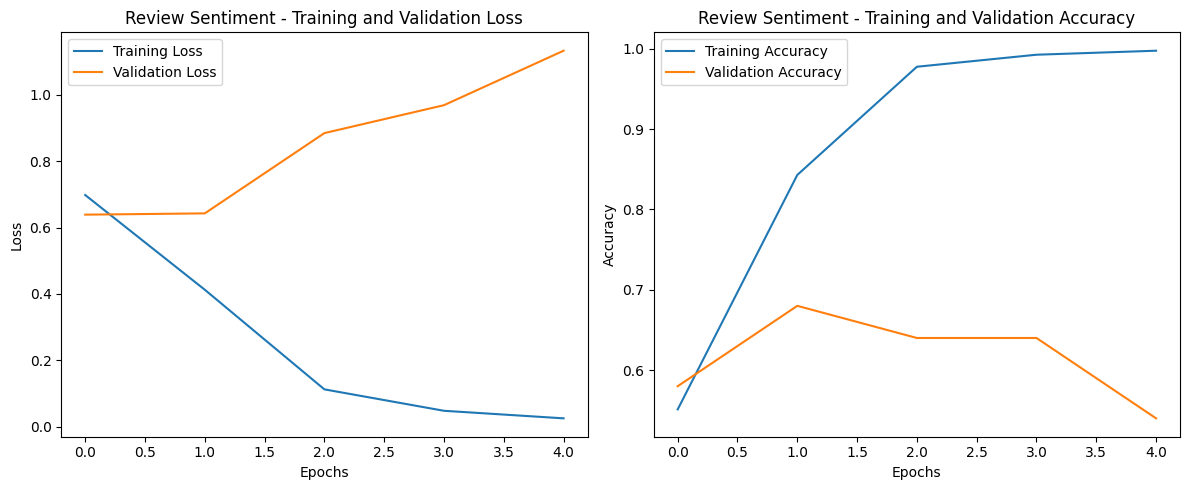

In [60]:
model_with_embedding = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    SimpleRNN(units=64, activation='tanh'),
    Dense(1, activation='sigmoid')  # Single output unit for binary classification
])
model_with_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_with_embedding = model_with_embedding.fit(
    X_train, y_train,
    epochs=5, batch_size=16,
    validation_data=(X_val, y_val)
)
plot_training_metrics(history_with_embedding, 'Review Sentiment')


In [61]:
test_accuracy = model_with_embedding.evaluate(X_test, y_test)[1]
print("Model without Embedding Test Accuracy:", test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6838 - loss: 0.8363 
Model without Embedding Test Accuracy: 0.7218543291091919


In [48]:
X = pad_sequences(sequences, maxlen=25, padding='post', truncating='pre')
y = np.array(labels)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3333, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5901 - loss: 0.6899 - val_accuracy: 0.6000 - val_loss: 0.6625
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8165 - loss: 0.4994 - val_accuracy: 0.6400 - val_loss: 0.6697
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9132 - loss: 0.2543 - val_accuracy: 0.6400 - val_loss: 0.7480
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9516 - loss: 0.1488 - val_accuracy: 0.7000 - val_loss: 0.6679
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9826 - loss: 0.0785 - val_accuracy: 0.7600 - val_loss: 0.6577


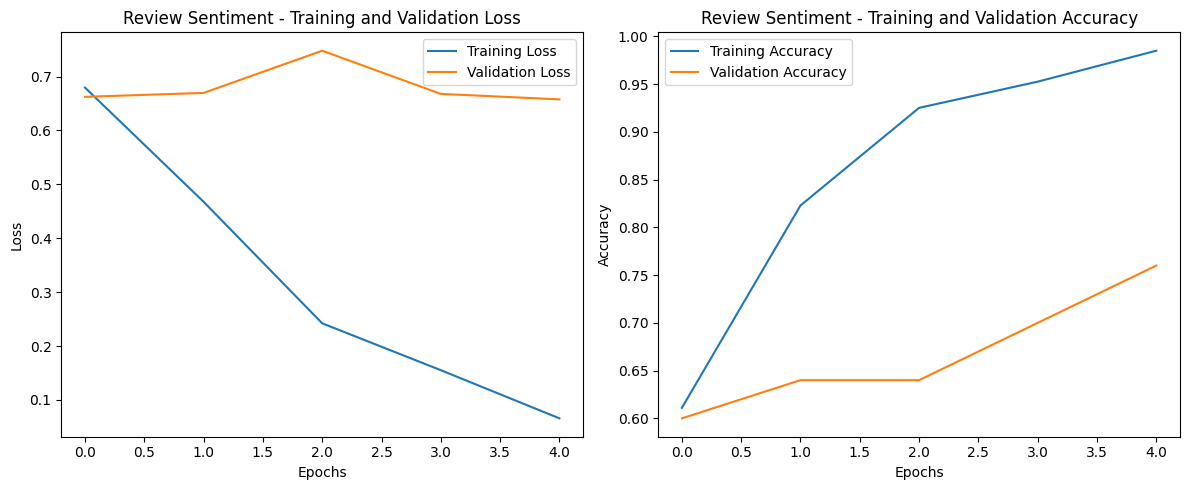

In [49]:
model_with_embedding = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=40),
    SimpleRNN(units=64, activation='tanh'),
    Dense(1, activation='sigmoid')  # Single output unit for binary classification
])
model_with_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_with_embedding = model_with_embedding.fit(
    X_train, y_train,
    epochs=5, batch_size=16,
    validation_data=(X_val, y_val)
)
plot_training_metrics(history_with_embedding, 'Review Sentiment')



In [50]:
test_accuracy = model_with_embedding.evaluate(X_test, y_test)[1]
print("Model without Embedding Test Accuracy:", test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 0.5921 
Model without Embedding Test Accuracy: 0.6754966974258423
